# Looking at the Fundementals of Quantum Error Correction - Correcting a Bit Flip Error

In this notebook I will be reviewing the basics of quantum computing then trying to run a basic Bit-Flip error corrector and trying to explain along for my own understanding to get a grasp on the fundamentals of Qiskit and basic quantum computing

## Reviewing the Basics

### Qubits
- A qubit is the fundamental unit of quantum information.
- A classical bit can be in two states, either 1 or 0; qubits can be in a superposition of both states simultaneously.y 
-  qubit state can be written as $ \lvert \psi \rangle = \alpha \lvert 0 \rangle + \beta \lvert 1 \rangle $.
- Naturally, when you take the modulus squared, it represents the probability of measuring the qubit in state $ \lvert 0 \rangle$ or $ \lvert 1 \rangle $.

### Entanglement:
- Quantum entanglement is when qubits become interconnected such that the state of one qubit directly affects the state of another, no matter how far apart they are (think Bell's inequality from the Quantum module).
- For example, an entangled pair might exist in the state $ \lvert \psi \rangle = \frac{1}{\sqrt{2}} \left( \lvert 00 \rangle + \lvert 11 \rangle \right) $.
- If the first qubit is measured and found to be in the $ \lvert 0 \rangle$ state, the second will also be in the $ \lvert 0 \rangle$ state, and vice-versa for the $ \lvert 1 \rangle $ state.


### Quantum Gates
- Quantum gates are the basic operations that change the state of qubits; they are like the quantum versions of classical logic gates
#### some examples:
- Pauli-X gate: Like a NOT Gate flips $ \lvert 0 \rangle$ to $ \lvert 1 \rangle $ and vice-vera
$$
X \lvert 0 \rangle = \lvert 1 \rangle, \quad X \lvert 1 \rangle = \lvert 0 \rangle
$$
- Hadamard gate (H-gate): This creates a superposition. For example applying $H\lvert 0 \rangle$ gives state $$
\lvert \psi \rangle = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle + \lvert 1 \rangle \right)
$$
- CNOT (Controlled NOT gate): A two-qubit gate where the second qubit is flipped if the first qubit is in the $ \lvert 1 \rangle$ state. This is used to create entanglement. If we use the superposition state from applying the Hadamard gate, we can then apply it to the whole system of 2 qubits using the tensor product:
$$
|\psi\rangle = H|0\rangle \otimes |0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |0\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |10\rangle)
$$
This is the superposition of the 2-qubit states. Now, if we apply the CNOT gate, we can clearly see that it flips the second qubit into a 1, giving the entangled state:
$
\lvert \psi \rangle = \frac{1}{\sqrt{2}} \left( \lvert 00 \rangle + \lvert 11 \rangle \right)
$

### Noise and Errror in Quantum Computing
Quantum computers are highly sensitive to noise, which can easily disrupt the delicate states of qubits. In a real-world quantum system, qubits are prone to various kinds of errors:
- Bit-flip errors, this is when the qubit state $ \lvert 0 \rangle$ changes to a $ \lvert 1 \rangle $ or $ \lvert 1 \rangle $ changes to a $ \lvert 0 \rangle$
- Phase-flip errors, This changes the relative phase of the qubit state, for example the phase-flip turns a $
\alpha \lvert 0 \rangle + \beta \lvert 1 \rangle$ to a $\alpha \lvert 0 \rangle - \beta \lvert 1 \rangle$, notice how the probability amplitude has not changed
- combined error- This is when both bit-flip and phase-flip errrors can happen simultaneously 
We can solve these errors using Quantum Error Correction Techniques

### Quantum Errror Corrrection (QEC)
- In a classical computer, error correction is straightforward, but quantum error correction is more difficult due to the 'no cloning theorem.' This theorem states that if you have an unknown state, it is not possible to make an identical copy i.e quantum information cannot be copied exactly. This is further complicated by the superposition principle
- Quantum error correction codes are designed to protect quantum information from errors caused by decoherence and other quantum noise.ntum information is protected frrom errors bnecause of decohereance and other quantum noise

#### Basic Idea
A single logical qubit is encoded into multiple physical qubits in such a way that errors can be detected and corrected without destroying the quantum information. These steps are usually taken:
- Encoding: Spread the quantum information across multiple qubits.
- Syndrome measurement: Detect errors without directly measuring the quantum state, as the superposition would collapse. Syndrome measurement works using auxiliary qubits that are entangled with the encoded qubits and help extract information without collapsing the quantum state. The actual syndrome measurement is done on the auxiliary qubits. Quantum gates are applied between the data qubits and the auxiliary qubits in such a way that the errors affecting the logical qubits are transferred to the auxiliary qubits.
- Recovery: Apply corrections to restore the quantum state using quantum logic gates.

### Bit-Flip Error Correction Example
#### Encoding
To protect a single qubit, we can encode it into 3 qubits. So instead of having $ \lvert \psi \rangle = \alpha \lvert 0 \rangle + \beta \lvert 1 \rangle $, we use 3 qubits: $
\lvert \psi \rangle = \alpha \lvert 000 \rangle + \beta \lvert 111 \rangle
$
This is called the 3-qubit bit-flip code.

#### Syndrome Measruement
- If a bit-flip error happens on one of the qubits, we need to figure out which one has flipped. We measure the qubits in such a way that we don't disturb the quantum state but still gain enough information to detect which qubit has been affected.
- Essentially, since there are 3 qubits, if 1 is different from the other 2, a bit-flip error has occurred.

#### Correction 
- Once we detect the error, we can correct it by flipping the affected qubit back to its original state. This method works for a single bit-flip error.


### Phase-Flip Error Correction
- We can construct codes to correct phase-flip errors using something called the Shor Code.
- The Shor Code combines bit-flip and phase-flip error correction and uses 9 qubits to encode a single logical qubit, protecting against both types of errors.

## Simulating the Bit-Flip error correction

In [1]:
from qiskit import QuantumCircuit

In [2]:
# here we arre crrreating a qquantum circuit with 5 qubits and 2 classical bits and 3 data bits 
qc = QuantumCircuit(5,5)

In [3]:
qc.h(0) # apply H gate

This is the H-gate being applied to the first qubit of 0 then it is being put in the superposition state ie |+> so only the first qubit is in superposition now
$H\lvert 0 \rangle =  \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle + \lvert 1 \rangle \right)
$

In [4]:
qc.cx(0,1)

This is the CNOT gate being applied to entangle qubits , remember the CNOT gate creates an entangled state as the second qubit is flipped if the first cubit is $ \lvert 1 \rangle $ which is given by the entangles state : $
\lvert \psi \rangle = \frac{1}{\sqrt{2}} \left( \lvert 00 \rangle + \lvert 11 \rangle \right)
$

We are entangling qubit 0 with qubit 1, where 0 is the control and 1 is the target 

In [5]:
qc.cx(0,2)

Similarly we do it again here where we entangle qubit 0 with qubit 2
so if qubit 0 is $ \lvert 0 \rangle$ qubit 2 stays the same but if cubit 0 is $ \lvert 1 \rangle$ qubit 2 is flipped this essentially entangles the three qubits 1,2,3
$
\lvert \psi \rangle = \frac{1}{\sqrt{2}} \left( \lvert 000 \rangle + \lvert 111 \rangle \right)
$

In [6]:
qc.x(1) #introduce error

This part of the code flips the state of qubit 1 which simulates a bit flip error

In [7]:
#### Syndrome Measurement to detect the bit flip errror without collapse
qc.cx(0, 3)  # Compare qubit 0 and ancilla qubit 3
qc.cx(1, 3)  # Compare qubit 1 and ancilla qubit 3
qc.cx(0, 4)  # Compare qubit 0 and ancilla qubit 4
qc.cx(2, 4)  # Compare qubit 2 and ancilla qubit 4

We know qubits 0, 1, and 2 are the quantum qubits, and qubits 3 and 4 are the auxiliary/ancilla qubits. We are comparing the quantum qubits with the auxiliary qubits, so like before, the CNOT gate flips the second qubit if the first qubit is in state $ \lvert 1 \rangle $. This essentially stores information in the auxiliary qubits, as explained below:

The first two CNOTs compare and check if qubit 0 and qubit 1 are different, and store the result in ancilla qubit 3.
The next two CNOTs compare qubit 0 and qubit 2 to check if they are different, and store the result in ancilla qubit 4.

From these results, you can build the logic for the system to check which qubit has been flipped.
For example, if qubit 0 and qubit 1 are different, ancilla 3 will be 1, and if qubit 0 and qubit 2 are the same, ancilla 4 will be 0. This tells us that qubits 0 and 2 are the same, but qubit 0 and qubit 1 are different. Logically, this means that qubit 1 must have been flipped

In [8]:
qc.measure([3, 4],[0,1])  # Measure ancilla qubits

We are measuring the ancilla qubits 3 and 4 and storing their results into classical bits, as the state of the qubits collapses after measurement. The first parameter is the qubit index, which is the index of the qubit we want to measure in the quantum register, and the second parameter is the classical bit index, which is the index that will store the result of the measurement in the classical register

Here, we measure qubit 3 and store the result in classical bit 0, and then we measure qubit 4 and store the result in classical bit 1. Note that this does not collapse the entire quantum register.

For example, if qubit 1 has been flipped, the measurement of qubit 3 and qubit 4 will give the result 01 as the lleftmost bit will correspond to ancilla 4 and rightmost bit to ancilla 3 due to convention from highest classical bit index to lowest classicall bit index.

    00 indicates no bit-flip error,
    10 indicates a flip on qubit 0,
    01 indicates a flip on qubit 1,
    11 indicates a flip on qubit 2

### Simulating the Quantum Circuit

#### Error Correction
The c_if function allows us to apply quantum gates conditionally in Qiskit to implement a conditional quantum operation based on a classical measurement result. The way it works is that after measuring a qubit and storing the result in the classical register, we can then apply a gate or quantum operation depending on the value in the classical register

In [9]:
# Apply corrections based on syndrome measurements ie flip if statement stands
qc.x(1).c_if(qc.cregs[0], 1)  # If syndrome is '01' (decimal 1), correct qubit 1
qc.x(2).c_if(qc.cregs[0], 2)  # If syndrome is '10' (decimal 2), correct qubit 2
qc.x(0).c_if(qc.cregs[0], 3)  # If syndrome is '11' (decimal 3), correct qubit 0


The `.c_if()` method applied the quantum gate if the condition has been met, this is determing by its parametes `qc.cregs[0]` which is the classical registers value and the integer in the second argument of `.c_if()` which specifies the value that the classical register must have for the operation to be applied. ie the value in as an integer converted to binary must correrspond to the ancilla value of the circuit

In [10]:
qc.measure([0, 1, 2], [2,3,4])

This is performing a quantum measurement on the qubits and storing the results in the classical registers.

Text(0, 0.5, 'Frequency')

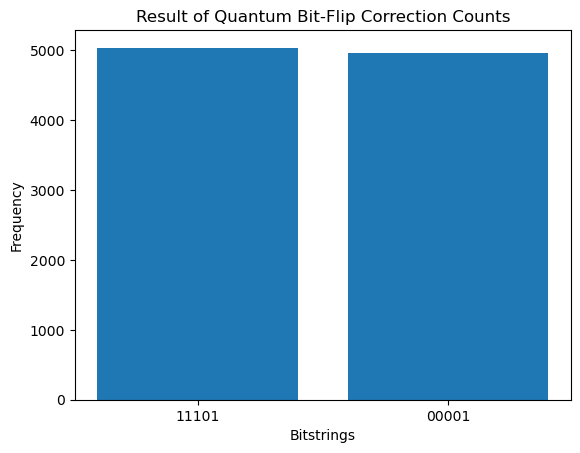

In [11]:
from qiskit_aer import AerSimulator #Aer simulator is the simulator backend for a quantum circuit
from qiskit import transpile
import matplotlib.pyplot as plt

num_shots = 10000 #no simulations

# For execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator) #optimise quantum circuit 
sim_result = simulator.run(compiled_circuit, shots = num_shots).result() #run simulation

counts = sim_result.get_counts() #store counts of measurement

#Plot Data
bitstrings = list(counts.keys())
frequencies = list(counts.values())

# Plot
plt.figure()
plt.bar(bitstrings,frequencies)

# decorations
plt.title('Result of Quantum Bit-Flip Correction Counts')
plt.xlabel('Bitstrings')
plt.ylabel('Frequency')

- Aer Simulator is used to run quantum circuits on a classical simulator
- Transpile optimises the quantum circuit for the specific simulator
- By running the simulator, the circuit is executed, and we get a return of the results, where `get_counts()` retrieves the outcomes.

As expected we can see from the results that the bit-flip error has been corrected the left most 3 bits are our qubits and we can see the two rightmost bits (ancilla) still have 01 which corrrepsonded to the intial qubit 1 bit flip, we know from the insital system setup the qubits are in superposition so thats why we simulate numerous times. as expected we can see the error being corrected in both cases